# Pandas installation 

`pandas` is neeeded for the sake of Data understanding and preparation  

In [2]:
%conda install pandas

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Dependencies libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

notebook_dir = Path().resolve()
LAB_CODES_PATH = notebook_dir.parents[1] / "Data" / "laboratory_events_codes_2.csv"

read the `*.csv` files we need for the **DU**. 

In [4]:
df = pd.read_csv(LAB_CODES_PATH)

## Identifyng attributes's character
Printing general  about the dataFrame `df`

In [5]:
df.shape

(978503, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978503 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978503 non-null  float64
 1   charttime          978503 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978503 non-null  object 
 9   fluid              978503 non-null  object 
 10  examination_group  978503 non-null  object 
 11  analysis_batch_id  978503 non-null  object 
 12  qc_flag            978503 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 104.5+ MB


# 1.2) Data Preparation

In [7]:
df = df.drop_duplicates()
df.shape

(978501, 14)

In [8]:
print("Number of total records:", len(df))
# Numero di record con valore ref_range mancante
missing_ref_range = df['ref_range'].isnull().sum()
print("Number of records with missing ref_range values:", missing_ref_range)

Number of total records: 978501
Number of records with missing ref_range values: 832286


Il numero dei float corrispondono al numero di valori nulli che abbiamo nella colonna `ref_range`


In [9]:
df['ref_range'].value_counts()

ref_range
Normal range: 10-20     49098
Normal range: 70-110    48619
Normal range: 3-5       48498
Name: count, dtype: int64

# Missing values
We estimate the percentage of *missing values* contained in each column. 

In [10]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"Column '{col}': {missing_percentage:.2f}% missing values")

Column 'hadm_id': 0.00% missing values
Column 'charttime': 0.00% missing values
Column 'value': 4.55% missing values
Column 'valuenum': 7.27% missing values
Column 'valueuom': 9.60% missing values
Column 'ref_range_lower': 11.54% missing values
Column 'ref_range_upper': 11.54% missing values
Column 'flag': 64.88% missing values
Column 'label': 0.00% missing values
Column 'fluid': 0.00% missing values
Column 'examination_group': 0.00% missing values
Column 'analysis_batch_id': 0.00% missing values
Column 'qc_flag': 0.00% missing values
Column 'ref_range': 85.06% missing values


Now, we estimate the types hiddenly taken by each columns

In [11]:
for col in df.columns:
    print (f"{col}: {df[col].map(type).value_counts()}")

hadm_id: hadm_id
<class 'float'>    978501
Name: count, dtype: int64
charttime: charttime
<class 'str'>    978501
Name: count, dtype: int64
value: value
<class 'str'>      934025
<class 'float'>     44476
Name: count, dtype: int64
valuenum: valuenum
<class 'float'>    978501
Name: count, dtype: int64
valueuom: valueuom
<class 'str'>      884585
<class 'float'>     93916
Name: count, dtype: int64
ref_range_lower: ref_range_lower
<class 'float'>    978501
Name: count, dtype: int64
ref_range_upper: ref_range_upper
<class 'float'>    978501
Name: count, dtype: int64
flag: flag
<class 'float'>    634814
<class 'str'>      343687
Name: count, dtype: int64
label: label
<class 'str'>    978501
Name: count, dtype: int64
fluid: fluid
<class 'str'>    978501
Name: count, dtype: int64
examination_group: examination_group
<class 'str'>    978501
Name: count, dtype: int64
analysis_batch_id: analysis_batch_id
<class 'str'>    978501
Name: count, dtype: int64
qc_flag: qc_flag
<class 'str'>    978501
N

### Bar chart for the missing values

/tmp/ipykernel_11428/4090193844.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')


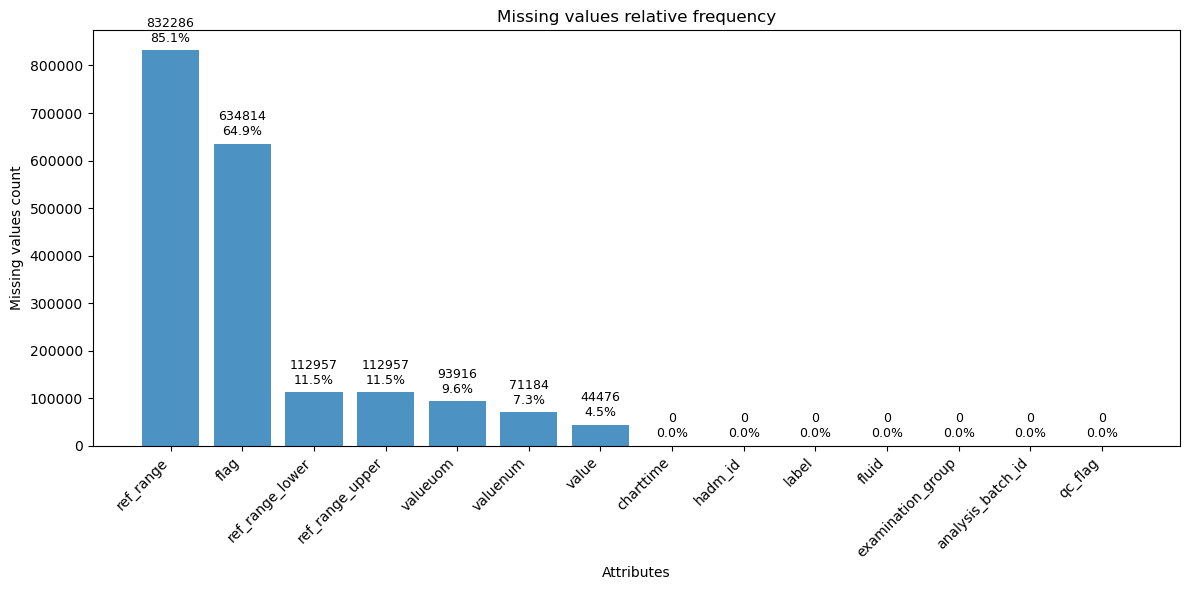

In [12]:
# Bar chart dei missing values per colonna (frequenza e percentuale)
missing_counts = df.isnull().sum()
total = len(df)
missing_counts = missing_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='tab:blue', alpha=0.8)
ax.set_title("Missing values relative frequency")
ax.set_xlabel("Attributes")
ax.set_ylabel("Missing values count")
ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')
for bar, count in zip(bars, missing_counts.values):
    pct = count / total * 100
    ax.annotate(f"{count}\n{pct:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

From this bar chart we can now see that the `flag` and `ref_range` attributes have a lot of missing values. 
Let's have a look at them.


#### `flag` Correction

In [13]:
df['flag'].value_counts()

flag
abnormal    343687
Name: count, dtype: int64

We can replace the `abnormal` with a 1, and the rest of the fields we put a 0 which indicates that the test is not abnormal.

In [14]:
df['flag'] = df['flag'].str.strip().str.lower()
df['flag'] = df['flag'].apply(lambda x: 1 if x == 'abnormal' else 0)
df['flag'].value_counts()

flag
0    634814
1    343687
Name: count, dtype: int64

#### `ref_range` correction

In [15]:
# Filtra le righe dove ref_range non è nullo
ref_range_not_null = df[df['ref_range'].notna()][['ref_range', 'ref_range_lower', 'ref_range_upper']]
print(ref_range_not_null.head(20))

                ref_range  ref_range_lower  ref_range_upper
6    Normal range: 70-110              4.8              5.9
10    Normal range: 10-20              8.4             10.3
21      Normal range: 3-5              2.7              4.5
29      Normal range: 3-5             27.0             32.0
32   Normal range: 70-110            150.0            440.0
37    Normal range: 10-20             12.0             16.0
40      Normal range: 3-5             82.0             98.0
42   Normal range: 70-110             10.5             15.5
56      Normal range: 3-5            133.0            145.0
58    Normal range: 10-20              6.0             20.0
66    Normal range: 10-20             25.0             36.5
68   Normal range: 70-110             12.0             16.0
72    Normal range: 10-20            150.0            440.0
77   Normal range: 70-110             22.0             32.0
79    Normal range: 10-20             96.0            108.0
83   Normal range: 70-110              1

From this result, we can observe that the there isn't coerence btw these columns. 
We can drop the column `ref_range` bc it has already a big percentage of missing values.

In [16]:
df.drop(columns=['ref_range'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978501 non-null  float64
 1   charttime          978501 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               978501 non-null  int64  
 8   label              978501 non-null  object 
 9   fluid              978501 non-null  object 
 10  examination_group  978501 non-null  object 
 11  analysis_batch_id  978501 non-null  object 
 12  qc_flag            978501 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.5+ MB


## Quality of tests

In [17]:
df['qc_flag'].value_counts()

qc_flag
OK      880807
WARN     78124
FAIL     19570
Name: count, dtype: int64

bar chart of valid/invalid tests

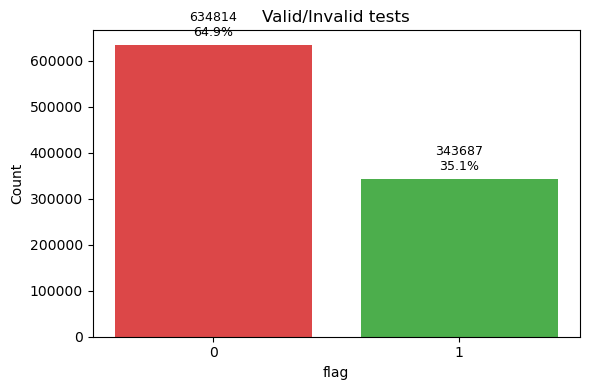

In [19]:
counts = df['flag'].value_counts()
labels = counts.index.astype(str)

fig, ax = plt.subplots(figsize=(6, 4))
colors = ['tab:green' if str(l).lower() in ('1', 'true', 'yes', 'valid', 'v') else 'tab:red' for l in labels]
bars = ax.bar(labels, counts.values, color=colors, alpha=0.85)

ax.set_title("Valid/Invalid tests")
ax.set_xlabel("flag")
ax.set_ylabel("Count")

for bar, cnt in zip(bars, counts.values):
    pct = cnt / len(df) * 100
    ax.annotate(f"{cnt}\n{pct:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()